# 2603655_DataAcquisition

## Week4 20240827

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

In [155]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("pandas version :",pd.__version__)
print("numpy version :",np.__version__)
print("matplotlib version :",mpl.__version__)
print("seaborn version :",sns.__version__)

pandas version : 2.2.1
numpy version : 1.26.4
matplotlib version : 3.8.4
seaborn version : 0.13.2


In [156]:
df = pd.read_csv('data/tham_luang_rescue_data.csv',
                 # parse_dates=['timestamp'],
                 # index_col=['datetime']
                )
df.drop(columns=['id'],inplace=True)
df['timestamp']=pd.to_datetime(df['timestamp'],unit='s')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        5000 non-null   datetime64[ns]
 1   mission_type     5000 non-null   object        
 2   team_size        5000 non-null   int64         
 3   water_level      4750 non-null   float64       
 4   depth            4371 non-null   float64       
 5   oxygen_level     4498 non-null   float64       
 6   temperature      4381 non-null   float64       
 7   victim_status    5000 non-null   object        
 8   victim_count     5000 non-null   int64         
 9   mission_success  5000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 390.8+ KB


In [157]:
df.isna().sum()

timestamp            0
mission_type         0
team_size            0
water_level        250
depth              629
oxygen_level       502
temperature        619
victim_status        0
victim_count         0
mission_success      0
dtype: int64

In [158]:
df.head()

timestamp mission_type  team_size  water_level  \
0 2018-07-03 00:06:54.802960634      medical          5     9.191810   
1 2018-07-02 00:21:53.542708635       rescue          4    10.122547   
2 2018-06-25 06:45:52.390477896  exploration          2    13.265970   
3 2018-06-30 22:24:39.175835133       rescue         10    11.141887   
4 2018-06-28 13:02:04.584917068  exploration         10    12.147761   

      depth  oxygen_level  temperature victim_status  victim_count  \
0  4.362105     16.717150    27.871266      critical             8   
1  5.184041      9.949614    27.585167        stable             7   
2  6.700720     22.294991    27.177927        stable             2   
3  5.722605     15.725127    30.659910      critical             6   
4  5.789450      4.073761          NaN        stable             4   

   mission_success  
0                1  
1                0  
2                0  
3                0  
4                0

## OJT

In [160]:
df[df.isna().all(axis=1)]

Empty DataFrame
Columns: [timestamp, mission_type, team_size, water_level, depth, oxygen_level, temperature, victim_status, victim_count, mission_success]
Index: []

In [161]:
df[df.isna().any(axis=1)]

timestamp mission_type  team_size  water_level  \
4    2018-06-28 13:02:04.584917068  exploration         10    12.147761   
8    2018-07-09 10:17:18.447689533       rescue          3     6.001525   
11   2018-07-04 10:53:01.596319199      medical          4     8.271053   
12   2018-06-23 05:28:05.857171535  exploration          8          NaN   
13   2018-06-23 21:52:23.428685665  exploration          5    14.743842   
...                            ...          ...        ...          ...   
4978 2018-07-04 04:55:32.826565266       supply          2     8.318277   
4986 2018-06-23 01:18:21.100219965  exploration          5    15.276570   
4987 2018-07-06 01:24:24.052810907       rescue          2     6.971582   
4991 2018-06-27 19:39:01.188237667      medical          6    12.141516   
4997 2018-06-25 23:24:51.418283701  exploration          4    14.257411   

         depth  oxygen_level  temperature victim_status  victim_count  \
4     5.789450      4.073761          NaN        stable             4   
8     3.314556     12.621470          NaN        stable            13   
11    4.196395     12.507527          NaN        stable             9   
12         NaN           NaN          NaN      critical             1   
13    7.524298           NaN    29.627839        stable             1   
...        ...           ...          ...           ...           ...   
4978  4.437159     17.043529          NaN      critical             9   
4986  7.842431           NaN    25.637212      critical             1   
4987  3.816649     20.607267          NaN        stable            10   
4991  5.642471     17.311944          NaN        stable             4   
4997  6.808118           NaN    25.263070        stable             2   

      mission_success  
4                   0  
8                   1  
11                  0  
12                  0  
13                  0  
...               ...  
4978                1  
4986                0  
4987                0  
4991                0  
4997                0  

[1365 rows x 10 columns]

In [162]:
df.isna().any(axis=1).value_counts()

False    3635
True     1365
Name: count, dtype: int64

In [163]:
for i in range(1,5):
    print (f'miss {i}: {len(df[df.isna().sum(axis=1)==i])}')

miss 1: 1016
miss 2: 95
miss 3: 222
miss 4: 32


In [164]:
# df[df.isna().sum(axis=1)>=2]
df[(df.isna().sum(axis=1) >= 2) & (df.isna().sum(axis=1) <= 3)]

timestamp mission_type  team_size  water_level  \
21   2018-06-28 16:47:20.248049498  exploration          7    13.268345   
25   2018-07-04 22:57:46.773354769       supply          3          NaN   
52   2018-06-30 22:19:45.357071400       supply          4    11.594949   
54   2018-07-06 21:43:44.924984932  exploration          4          NaN   
77   2018-07-04 02:04:09.169833899      medical          4          NaN   
...                            ...          ...        ...          ...   
4893 2018-07-08 02:27:29.129826068  exploration          7          NaN   
4909 2018-06-29 00:12:57.755551100      medical          4    11.597075   
4923 2018-07-07 21:33:40.004000901       rescue          8          NaN   
4950 2018-06-26 01:17:29.249850035  exploration          7          NaN   
4957 2018-06-26 08:57:48.213642836       supply         10          NaN   

      depth  oxygen_level  temperature victim_status  victim_count  \
21      NaN           NaN    26.269614        stable             4   
25      NaN           NaN    25.602066        stable             9   
52      NaN           NaN    28.991466        stable             6   
54      NaN           NaN    26.005402        stable            10   
77      NaN           NaN    26.196043      critical             9   
...     ...           ...          ...           ...           ...   
4893    NaN           NaN    27.532948        stable            12   
4909    NaN     20.895515          NaN      critical             5   
4923    NaN           NaN    28.622366      critical            11   
4950    NaN           NaN    30.724411       unknown             3   
4957    NaN           NaN    26.833354        stable             3   

      mission_success  
21                  0  
25                  1  
52                  1  
54                  1  
77                  1  
...               ...  
4893                1  
4909                0  
4923                1  
4950                0  
4957                1  

[317 rows x 10 columns]

In [165]:
df.isna().any()

timestamp          False
mission_type       False
team_size          False
water_level         True
depth               True
oxygen_level        True
temperature         True
victim_status      False
victim_count       False
mission_success    False
dtype: bool

In [166]:
missing_columns = df.isna().sum().to_frame().loc[lambda x:x[0]>0].index.to_list()
non_missing_columns = [col for col in df.columns if col not in missing_columns]
non_missing_columns.remove('timestamp')
focused_columns = ['mission_type', 'team_size','victim_status','victim_count']

In [167]:
missing_columns, non_missing_columns, focused_columns

(['water_level', 'depth', 'oxygen_level', 'temperature'],
 ['mission_type',
  'team_size',
  'victim_status',
  'victim_count',
  'mission_success'],
 ['mission_type', 'team_size', 'victim_status', 'victim_count'])

### Descriptive analysis

In [169]:
df_desc = df[missing_columns].describe().T
df_desc['skew'] = df[missing_columns].skew()
df_desc['kurtosis'] = df[missing_columns].kurtosis()
df_desc.T

water_level        depth  oxygen_level  temperature
count     4750.000000  4371.000000   4498.000000  4381.000000
mean        10.298641     5.141564     19.925995    27.859964
std          2.929289     1.482007      5.042446     1.938024
min          4.169353     1.997793     -0.001809    20.421595
25%          7.794069     3.882866     16.623480    26.568500
50%         10.309842     5.146677     19.988819    27.871747
75%         12.774526     6.383899     23.331810    29.129341
max         16.648985     8.221066     37.739561    35.181630
skew         0.000345     0.011558     -0.052036     0.003947
kurtosis    -1.129102    -1.093502      0.112162     0.067573

#### analysis by categorical vars

In [171]:
df_list = list()
for col in focused_columns:
    for val in df[col].unique():
        df_desc = df[df[col]==val][missing_columns].skew().to_frame()
        df_desc.columns=['skew']
        df_desc['kurtosis'] = df[df[col]==val][missing_columns].kurtosis()
        df_desc = df_desc.T.reset_index()
        df_desc['Detail'] = f'{col.upper()} = {val}'
        df_list.append(df_desc)

In [172]:
df_desc=pd.concat(df_list)
df_desc.sort_values(by=['index','Detail']).reset_index(drop=True)

index  water_level     depth  oxygen_level  temperature  \
0   kurtosis     2.397986  2.070893      0.246962     0.006136   
1   kurtosis    -0.067883 -0.057176     -0.012544    -0.042919   
2   kurtosis     1.751492  1.794128      0.042784     0.410361   
3   kurtosis    -0.097498 -0.130162      0.061594    -0.054693   
4   kurtosis    -1.169806 -1.149061     -0.031582    -0.205356   
5   kurtosis    -1.021259 -0.957894      0.037363     0.122840   
6   kurtosis    -1.137058 -1.124914      0.064814     0.005834   
7   kurtosis    -1.132010 -1.078289      0.411058     0.007269   
8   kurtosis    -1.189294 -1.195586     -0.095370    -0.070990   
9   kurtosis    -1.135760 -1.064512      0.040533     0.011114   
10  kurtosis    -1.067734 -1.007723      0.140991     0.243735   
11  kurtosis    -1.062319 -1.014447      0.182314     0.162427   
12  kurtosis    -1.212179 -1.201817      0.328597     0.212758   
13  kurtosis    -0.321915 -0.278312      0.516771     0.003447   
14  kurtosis    -0.072934 -0.127615     -0.102817    -0.055676   
15  kurtosis    -0.066065  0.439417      0.162833     0.164368   
16  kurtosis    -0.058687 -0.175028      0.185071     0.043812   
17  kurtosis    -0.061916 -0.219896     -0.271708     0.105342   
18  kurtosis    -0.248574 -0.001875     -0.387905     0.213414   
19  kurtosis    -0.193923 -0.131602     -0.034041     0.068966   
20  kurtosis     0.083397 -0.169454      0.393385    -0.030470   
21  kurtosis     0.004749  0.221281     -0.162902    -0.211192   
22  kurtosis     0.016082 -0.425797     -0.123275     0.100569   
23  kurtosis    -0.348735 -0.243032      0.218536     0.053947   
24  kurtosis    -0.297615  0.002879      0.475086     0.368287   
25  kurtosis    -0.243878  0.174246     -0.144383     0.345022   
26  kurtosis    -0.932439 -0.867736      0.008047     0.061016   
27  kurtosis    -0.972051 -0.959334      0.210046     0.088062   
28  kurtosis    -1.159108 -1.101669      0.082765     0.014030   
29      skew    -1.434000 -1.327924     -0.027248     0.006683   
30      skew     0.117353  0.155804     -0.065903     0.058812   
31      skew     1.448067  1.417778     -0.089536    -0.082578   
32      skew     0.160448  0.146063     -0.057850     0.036738   
33      skew     0.021010  0.050475     -0.040177    -0.149788   
34      skew     0.108006  0.148294      0.027178     0.040600   
35      skew    -0.039722 -0.048253     -0.020675    -0.070340   
36      skew    -0.019112 -0.042787     -0.200750     0.187395   
37      skew     0.013799 -0.018652     -0.197422     0.199280   
38      skew    -0.141893 -0.104925     -0.115674    -0.092430   
39      skew     0.114284  0.124413      0.053706    -0.107300   
40      skew    -0.028046 -0.003738     -0.103133    -0.165534   
41      skew    -0.039888 -0.005378      0.080990     0.171101   
42      skew     0.067346 -0.040860     -0.039179     0.047296   
43      skew    -0.097414 -0.009468      0.086729     0.033635   
44      skew    -0.008845  0.008181     -0.205553    -0.284410   
45      skew     0.013625  0.085504      0.101875    -0.175854   
46      skew     0.051517  0.008836      0.024041     0.000253   
47      skew    -0.113080 -0.033131     -0.048679     0.354481   
48      skew     0.145502  0.158877     -0.179772    -0.211463   
49      skew    -0.188289  0.010280     -0.024629    -0.071479   
50      skew     0.013758 -0.009522      0.156785    -0.142462   
51      skew     0.155715 -0.075290      0.133756     0.039025   
52      skew     0.019843 -0.025556     -0.256644    -0.077531   
53      skew    -0.188981 -0.131805     -0.246269     0.319179   
54      skew     0.106895  0.037150     -0.087607     0.439371   
55      skew     0.344995  0.369260     -0.029991    -0.001692   
56      skew    -0.275339 -0.252724     -0.078671    -0.001967   
57      skew     0.068627  0.003094     -0.021187     0.058265   

                        Detail  
0   MISSION_TYPE = exploration  
1       MISSION_TYPE = medical  
2        MISS

### Missing Analysis

#### overall analysis

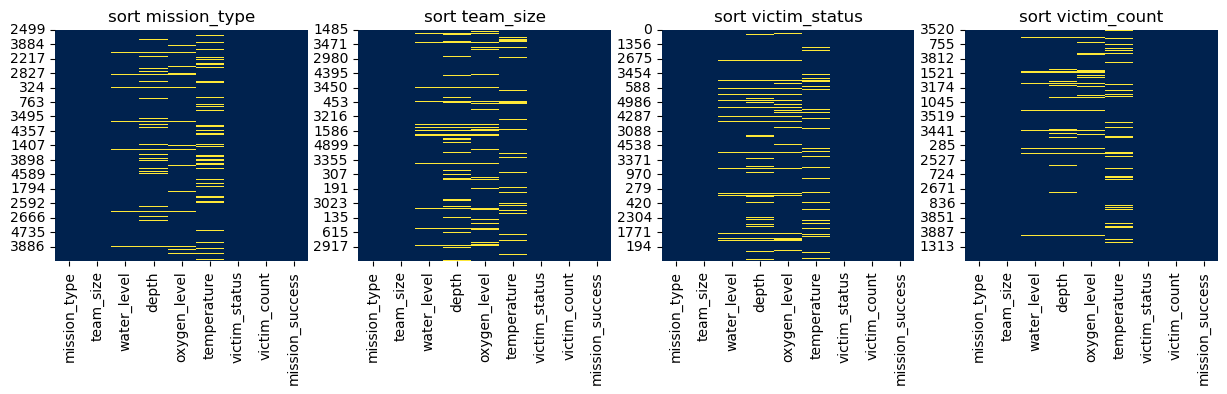

In [175]:
# overall
fig, axes = plt.subplots(1,4, figsize=(15,3))
for i,nm_col in enumerate(focused_columns):
    sns.heatmap(df.drop(columns=['timestamp']).sort_values(by=[nm_col]).isnull(),cbar=False,
                cmap='cividis',ax=axes[i])
    axes[i].set_title(f'sort {nm_col}')
plt.show;

# MAR for temp for weather at some cases

#### missing analysis by categorical vars (constraint): heatmap

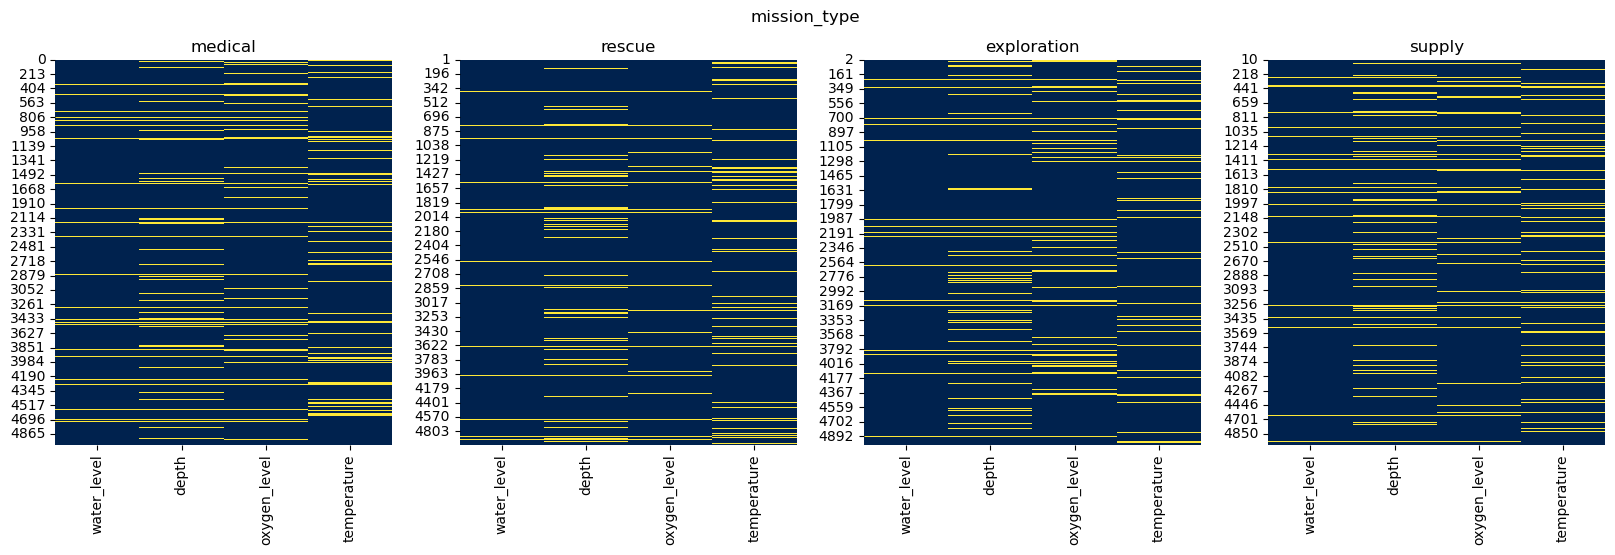

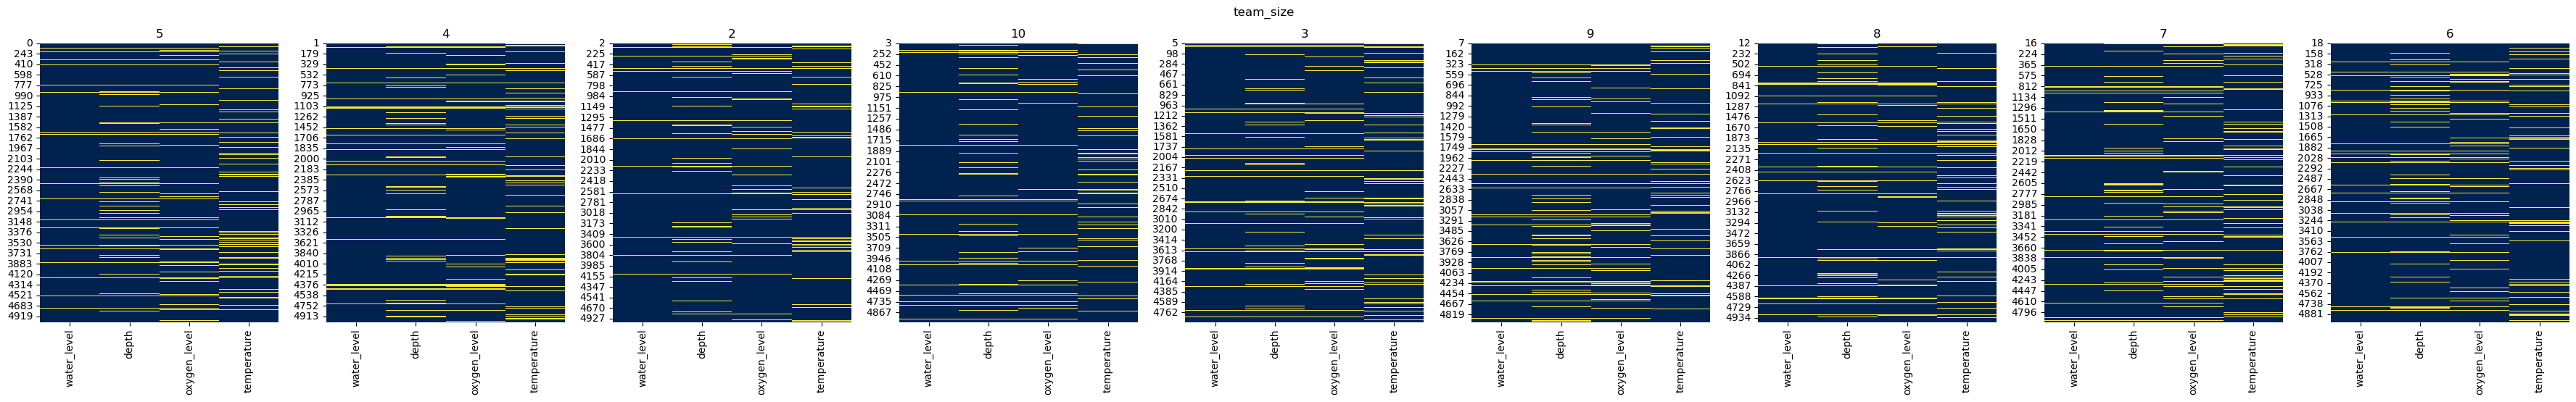

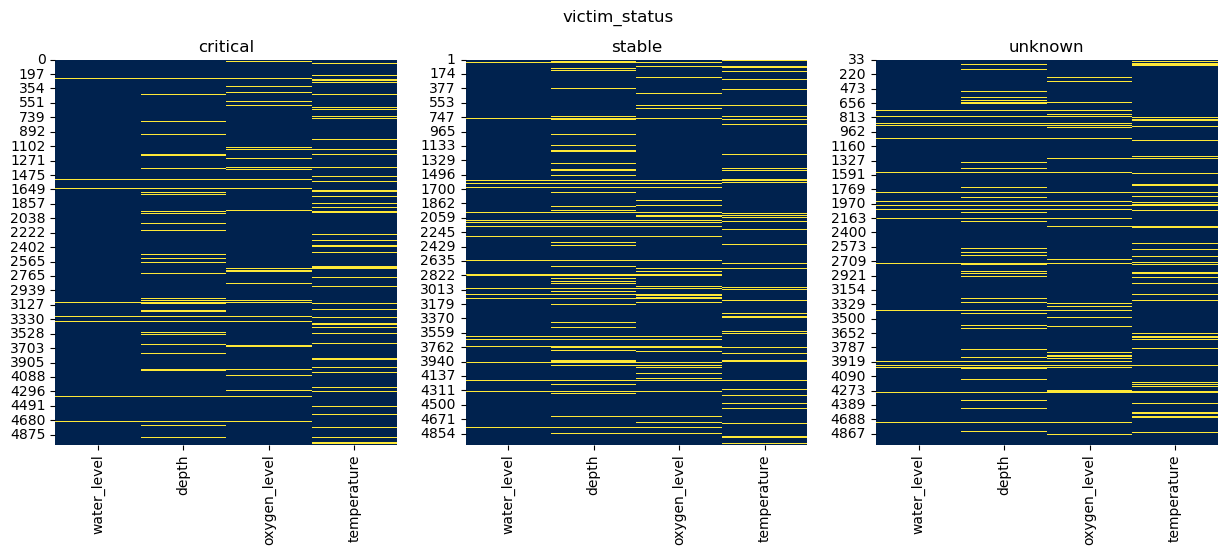

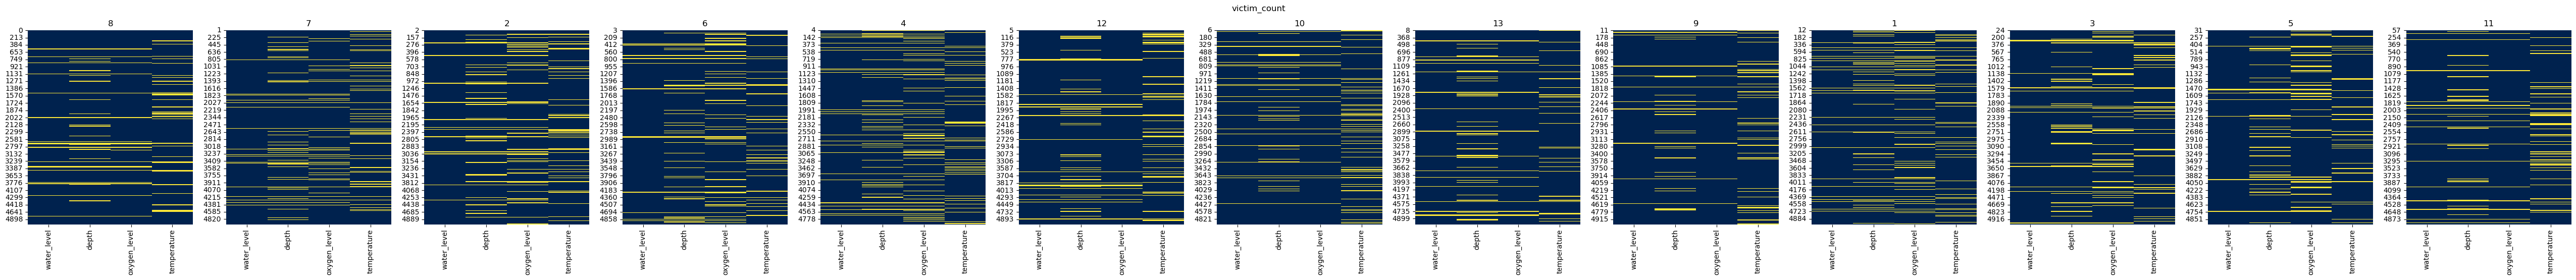

In [177]:
# constraint
for col in focused_columns:
    plt_column = len(df[col].unique())
    fig,axes=plt.subplots(1, plt_column, figsize=(5*plt_column,5))
    for i, val in enumerate(df[col].unique()):
        sns.heatmap(df[df[col]==val][missing_columns].isnull(),
                    cbar=False,cmap='cividis',ax=axes[i])
        axes[i].set_title(f'{val}')
    fig.suptitle(f'{col}')
    plt.show()

## EDA

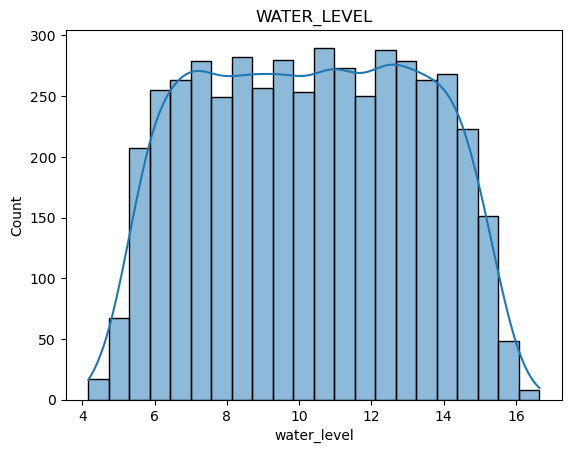

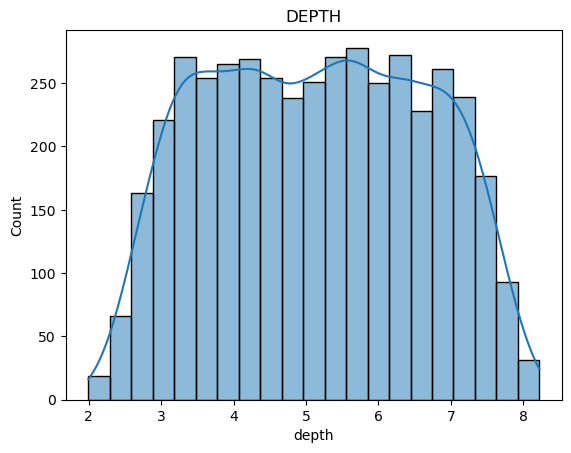

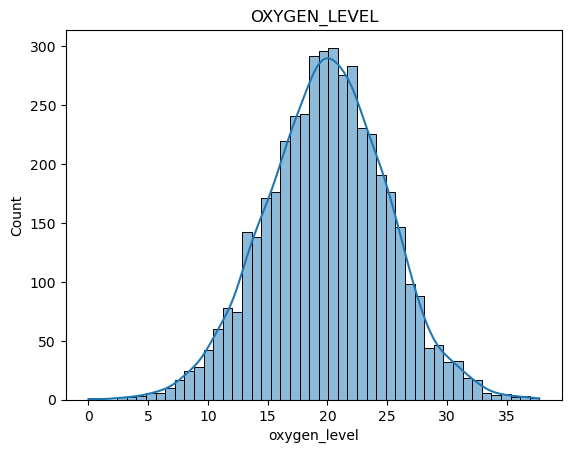

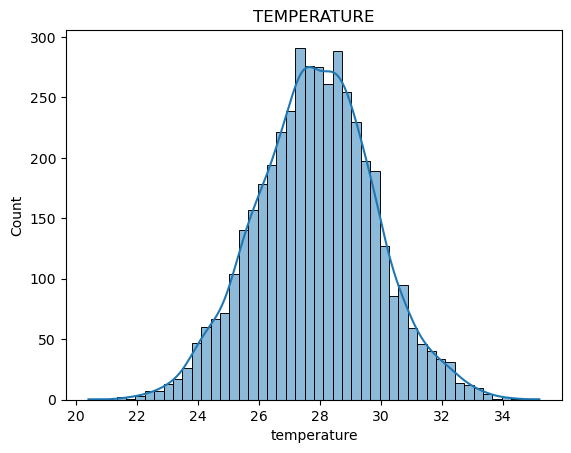

In [179]:
missing_columns = df.isna().sum().to_frame().loc[lambda x: x[0]>0].index.to_list()
# missing_columns

for col in missing_columns:
    sns.histplot(df[col], kde=True)
    plt.title(col.upper())
    plt.show()

point to explore
- minimum value
- distribution

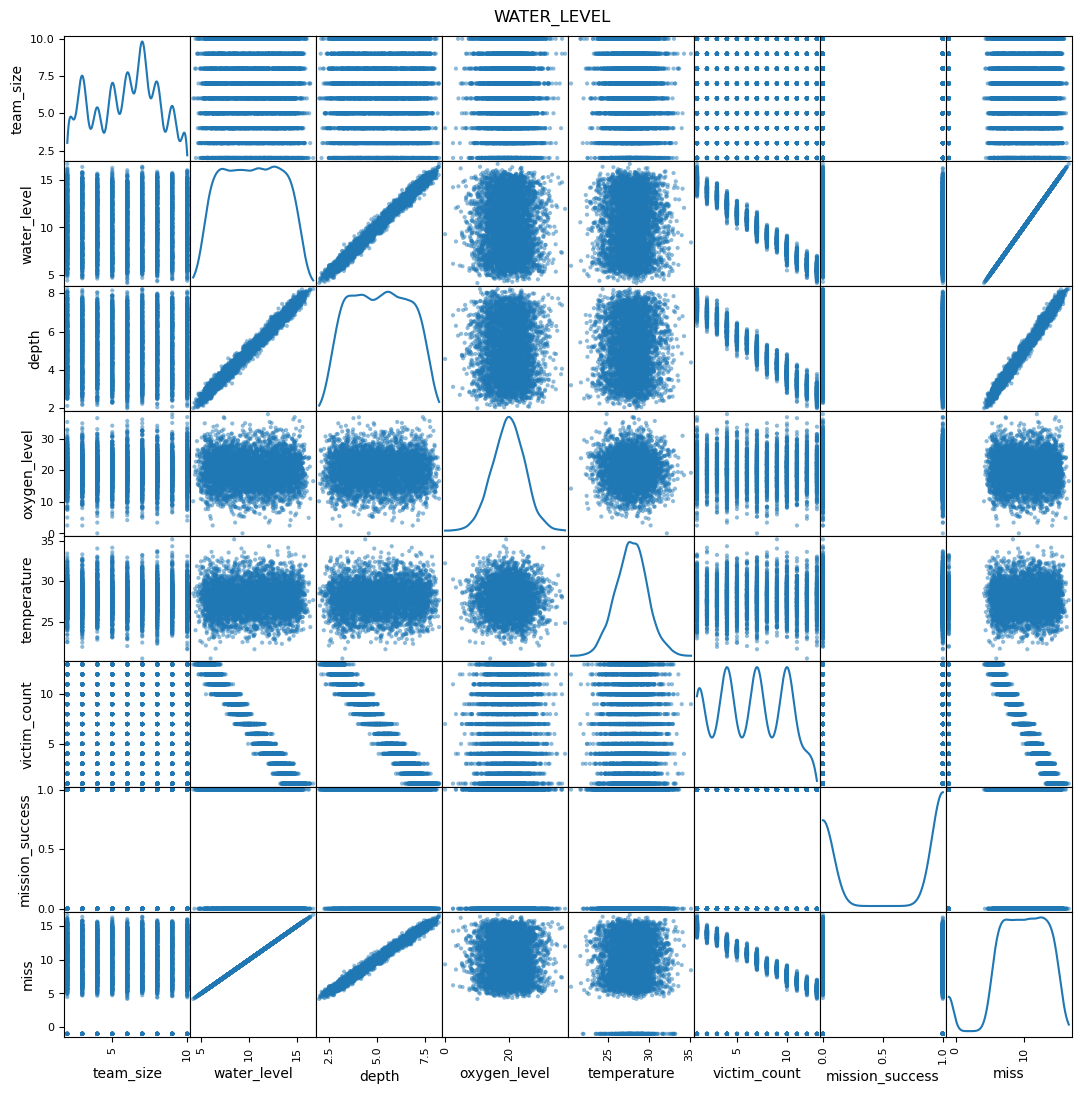

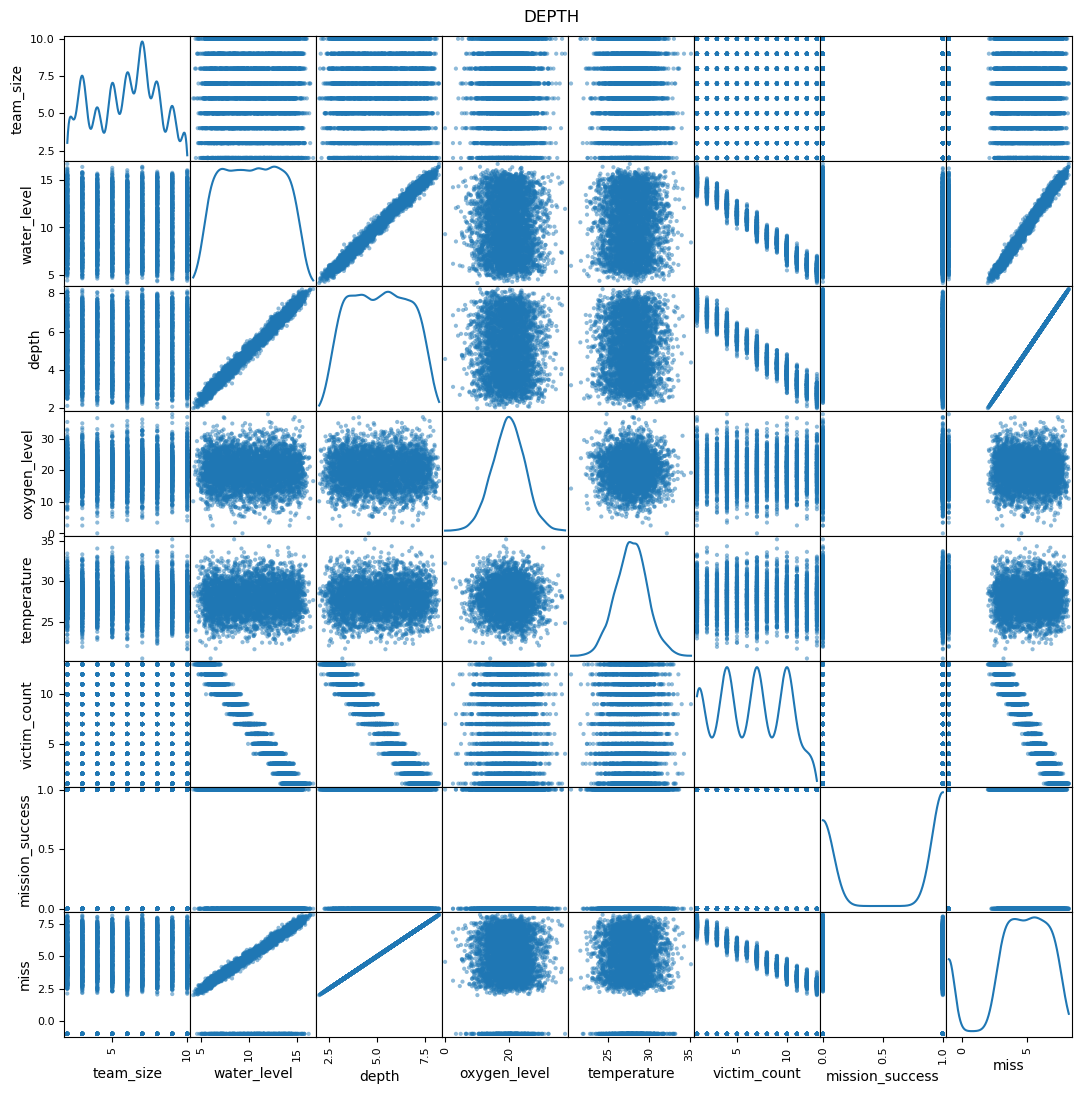

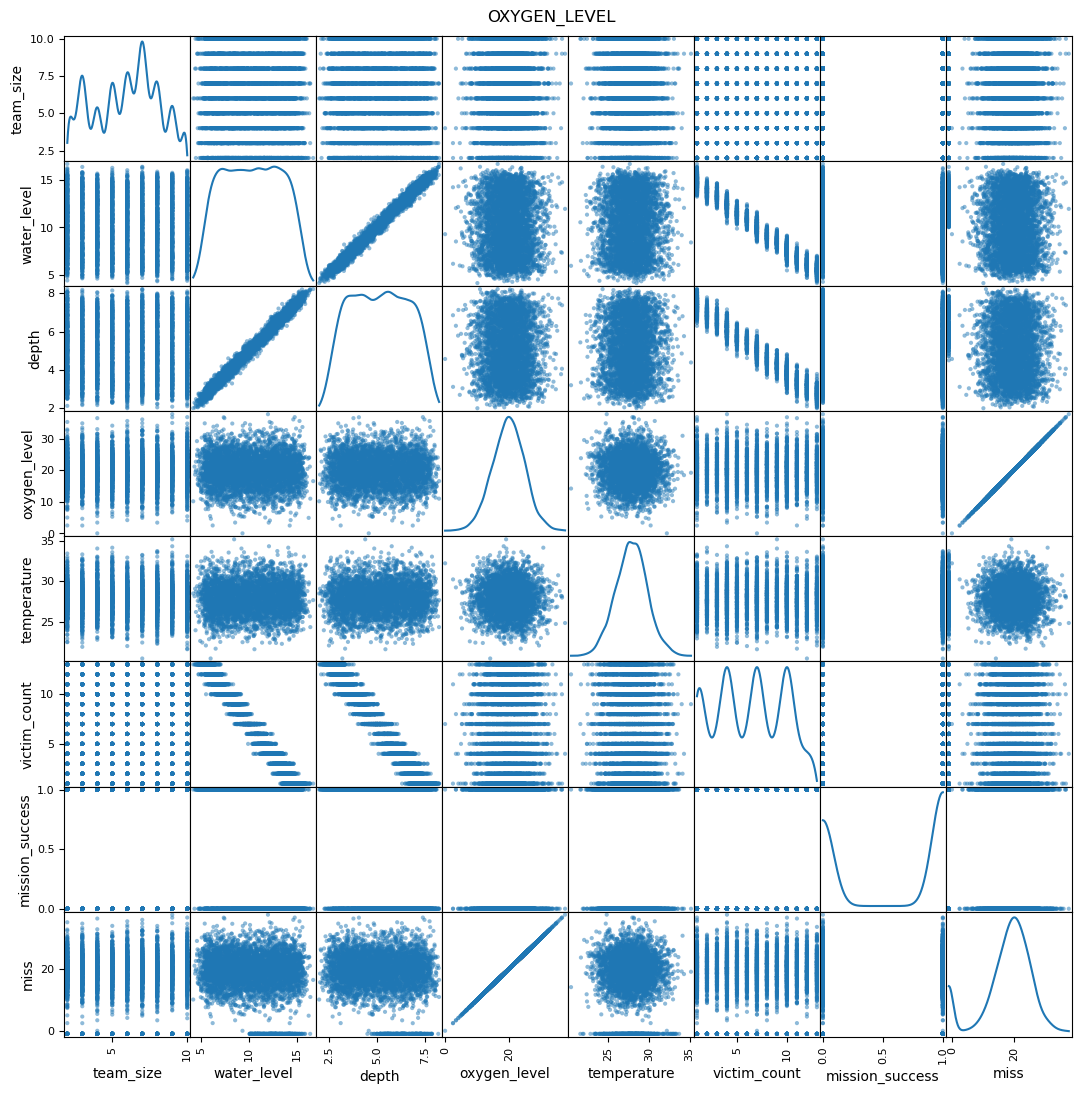

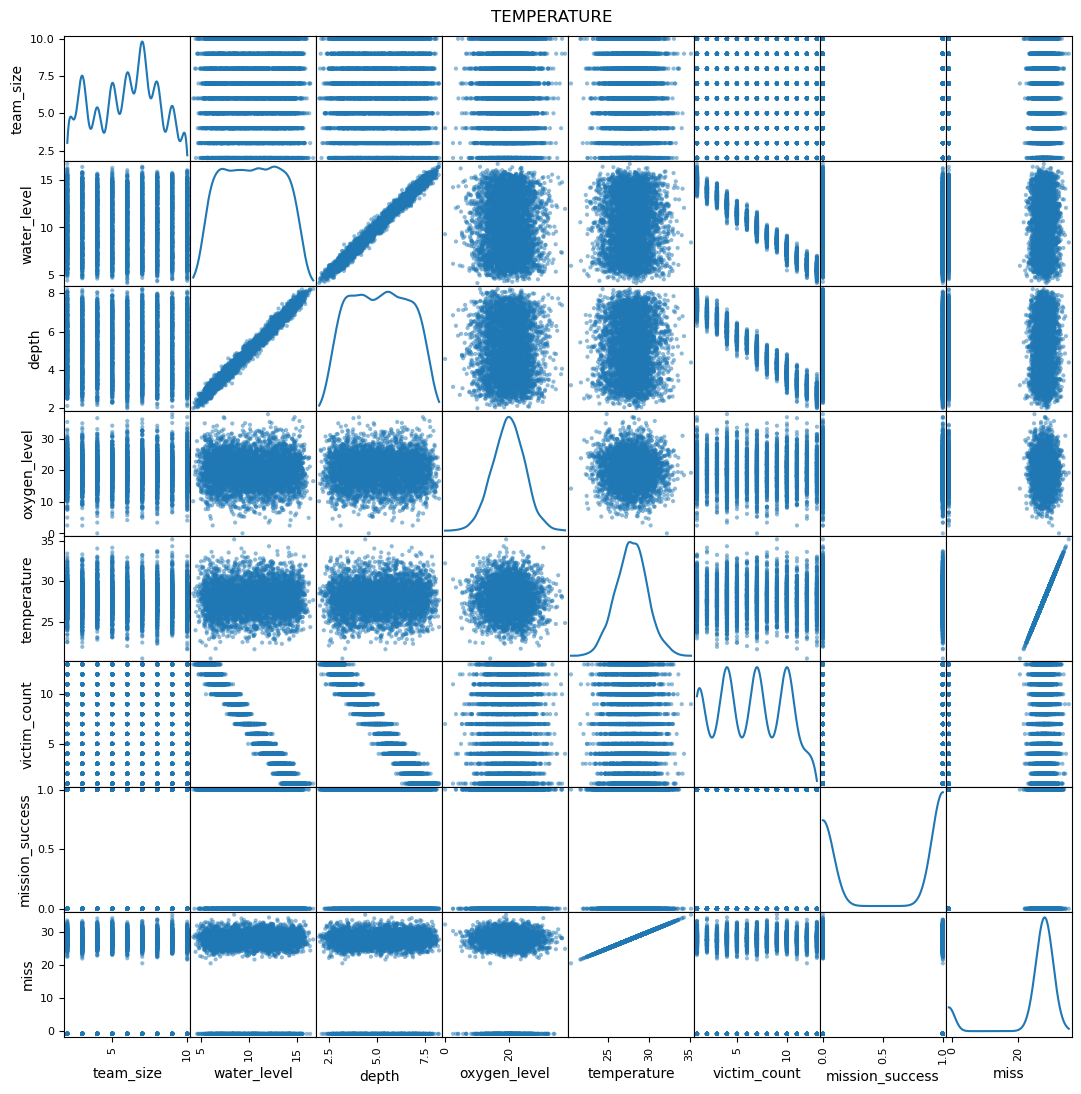

In [181]:
number_columns = list(df.select_dtypes(include=['number']).columns)
number_columns
df_number = df[number_columns].copy()

for col in number_columns:
    if df_number[col].isna().sum()>0:
        df_number['miss'] = df_number[col].apply(lambda x: -1 if np.isnan(x) else x)
        ax = pd.plotting.scatter_matrix(df_number,diagonal='kde', figsize=(13,13))
        plt.suptitle(col.upper(),y=0.9)

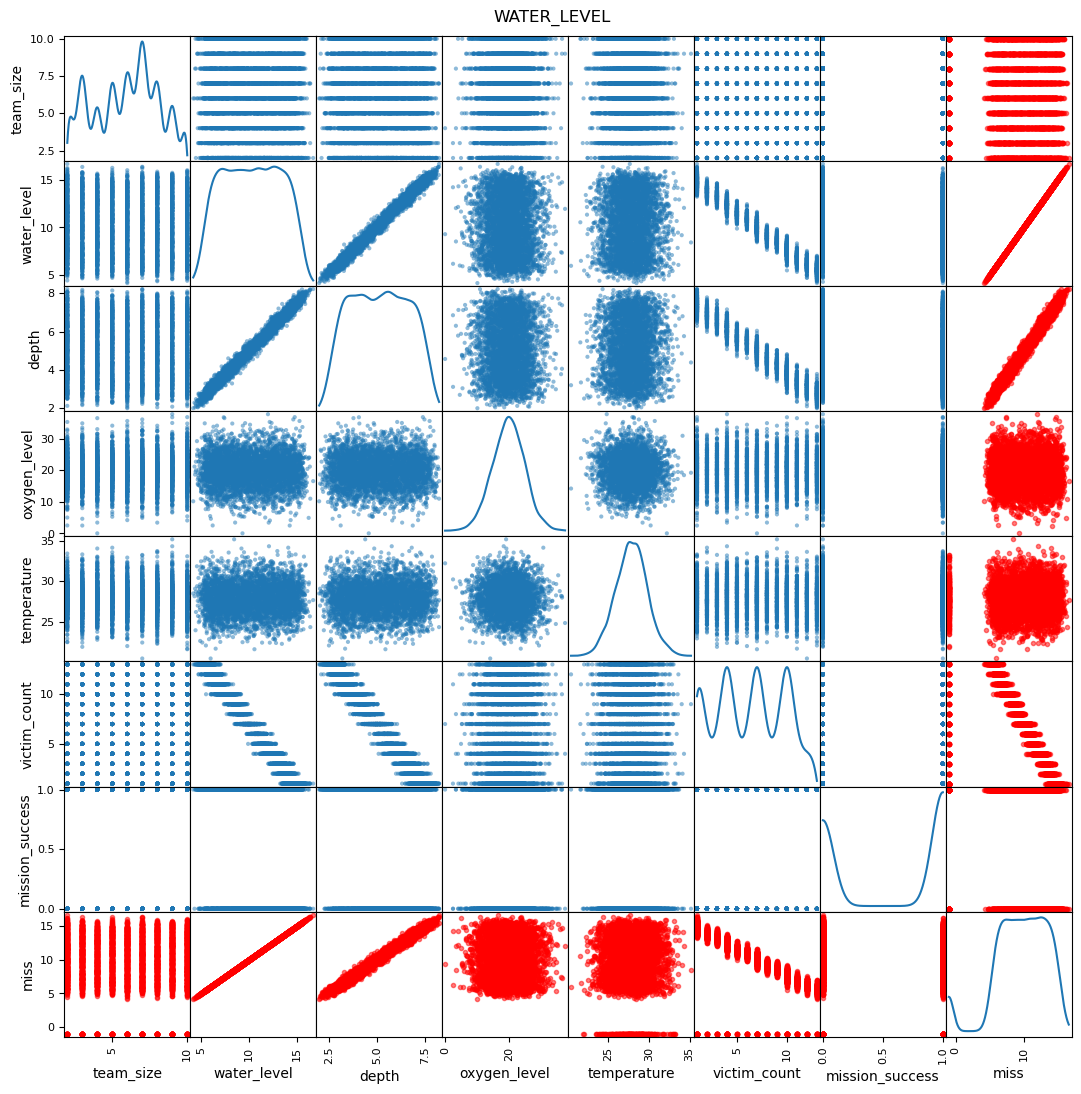

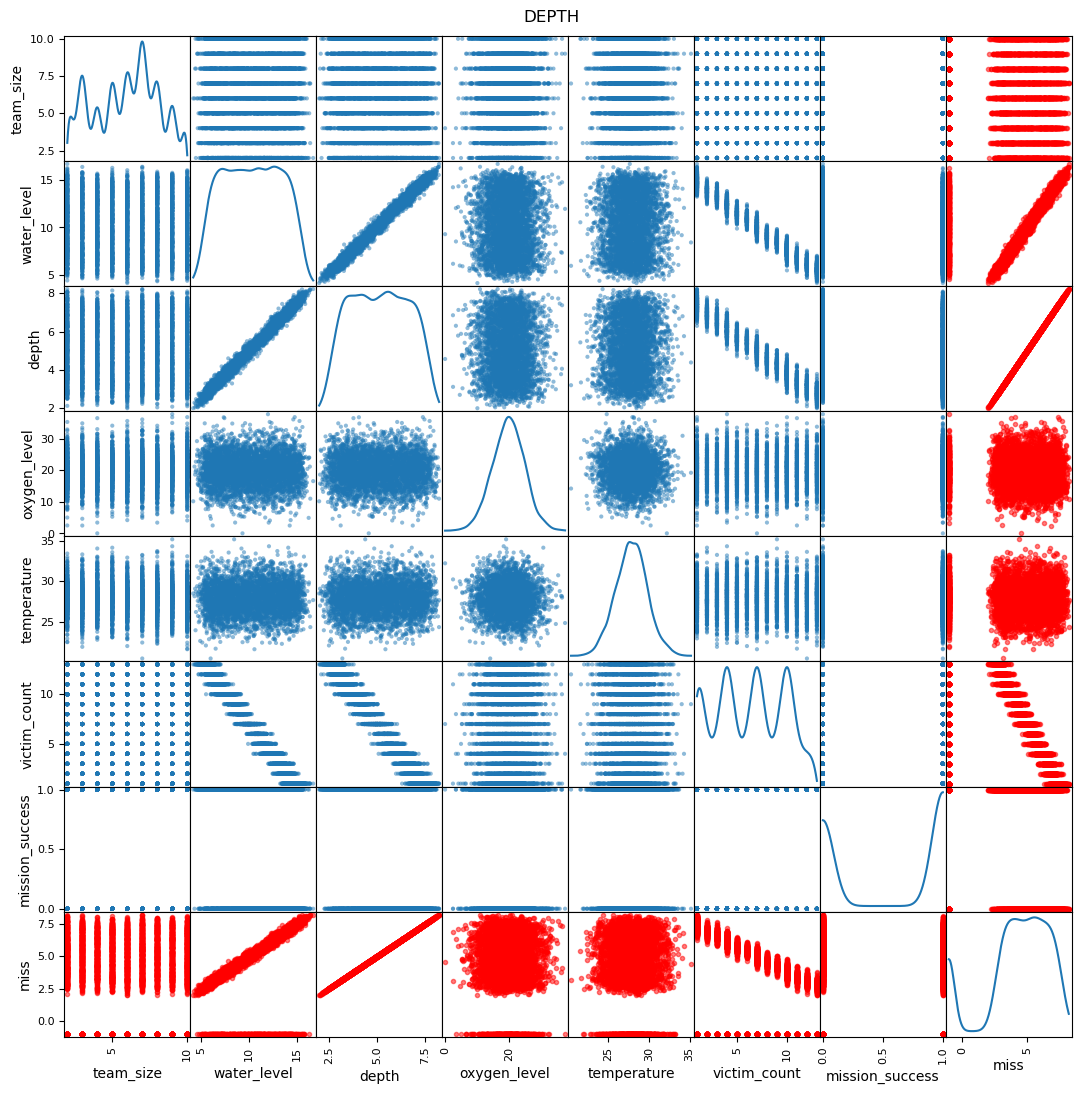

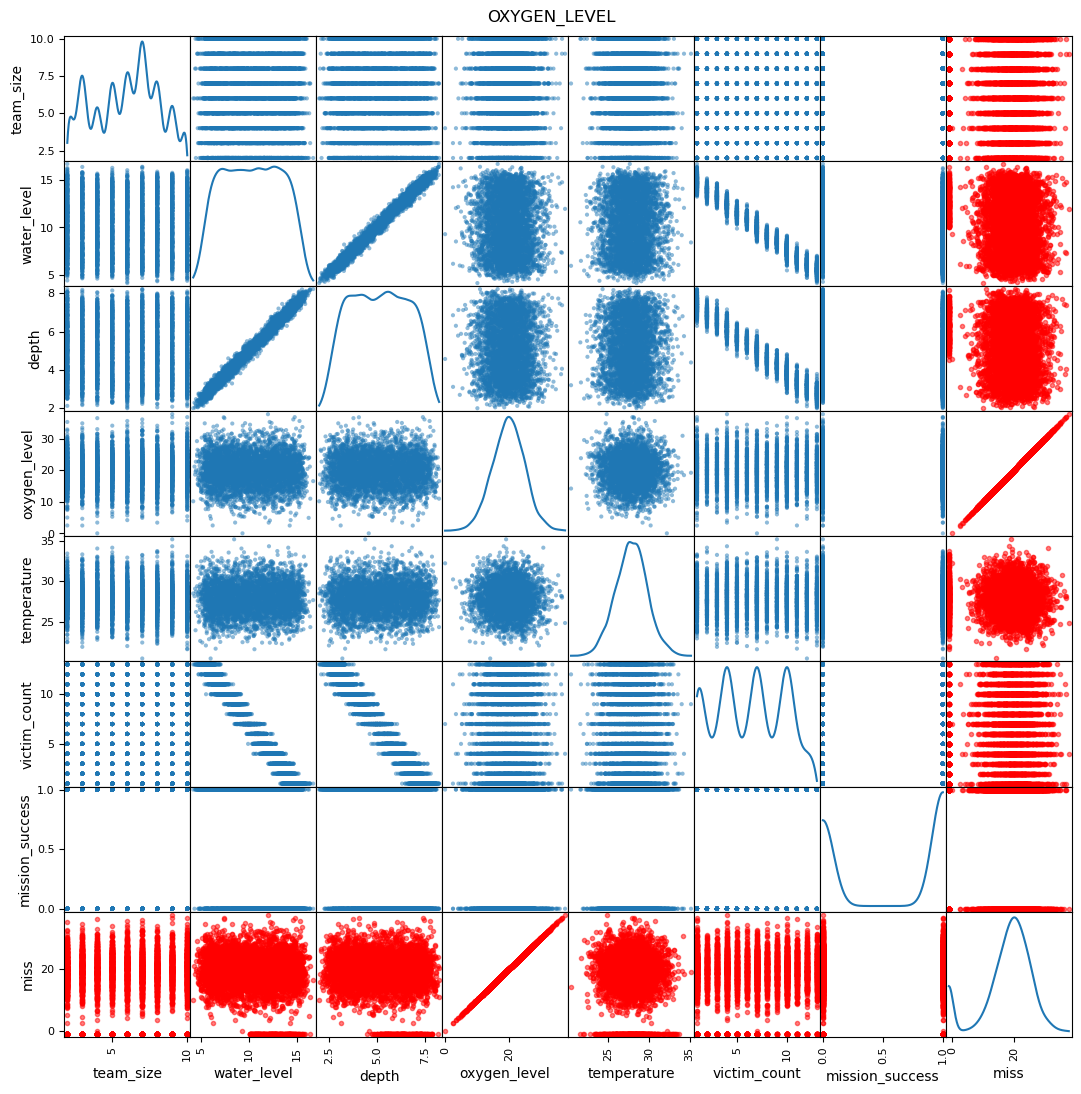

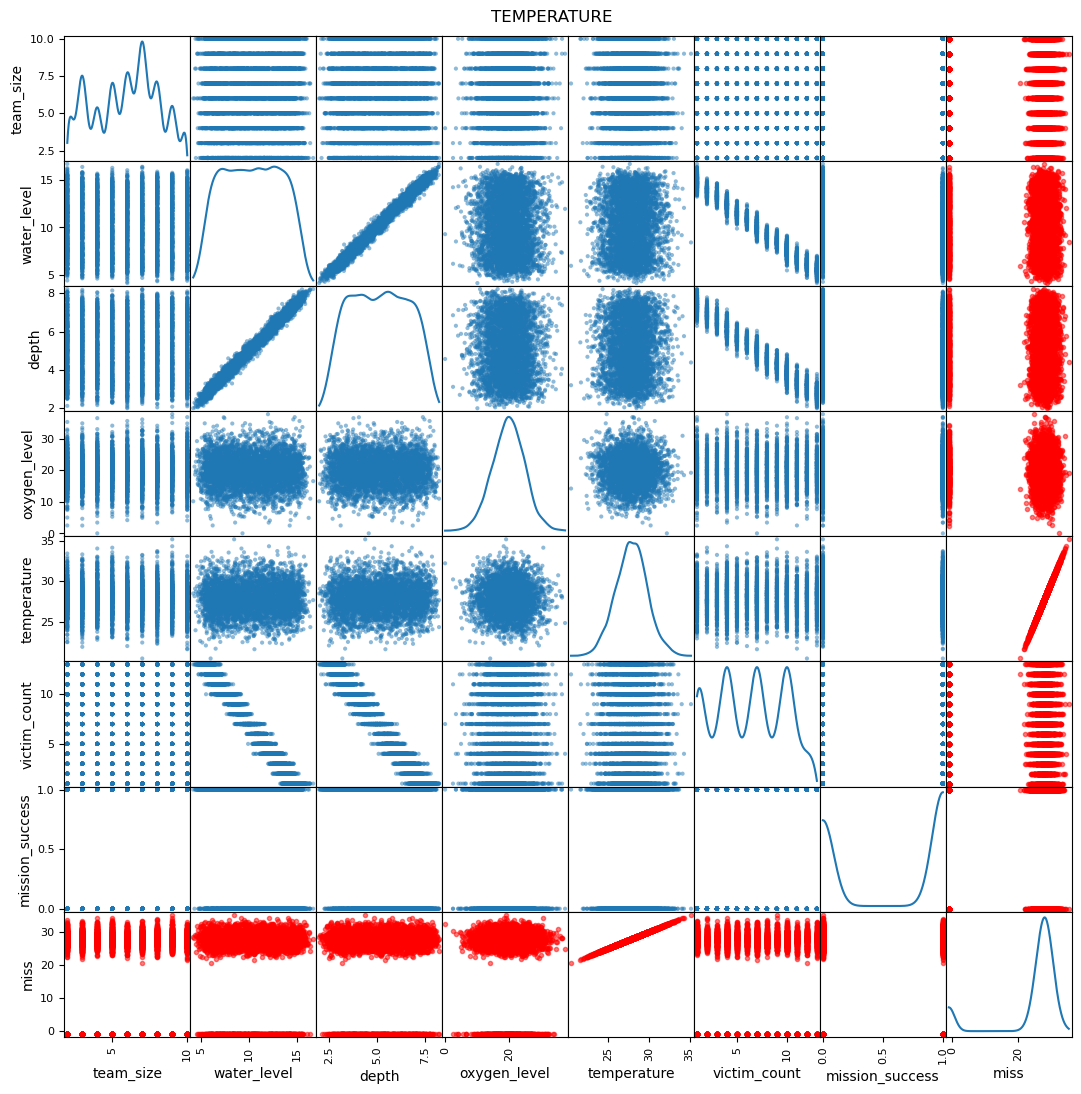

In [198]:
number_columns = list(df.select_dtypes(include=['number']).columns)
number_columns

# highlight to easily analyze
def high_light_var(ax_,variable_index):
    for i in range(len(df_number.columns)):
        for j in range(len(df_number.columns)):
            if i !=j:
                if i == variable_index or j == variable_index:
                    ax_[i,j].get_children()[0].set_color('red')
            
df_number = df[number_columns].copy()

for col in number_columns:
    if df_number[col].isna().sum()>0:
        df_number['miss'] = df_number[col].apply(lambda x: -1 if np.isnan(x) else x)
        ax = pd.plotting.scatter_matrix(df_number,diagonal='kde', figsize=(13,13))
        variable_index =df_number.columns.get_loc('miss')
        high_light_var(ax,variable_index)
        plt.suptitle(col.upper(),y=0.9)

### point 
- water level
- depth
- oxygen level
- temp

<Figure size 1200x500 with 0 Axes>

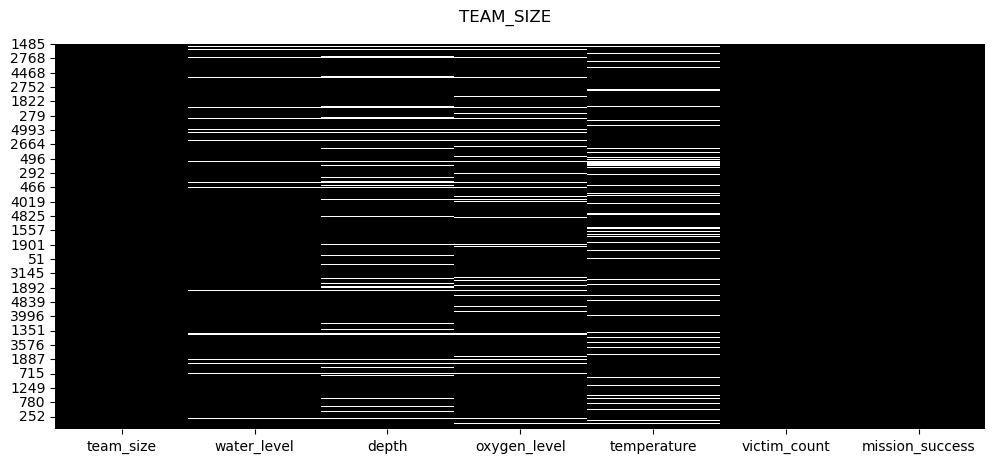

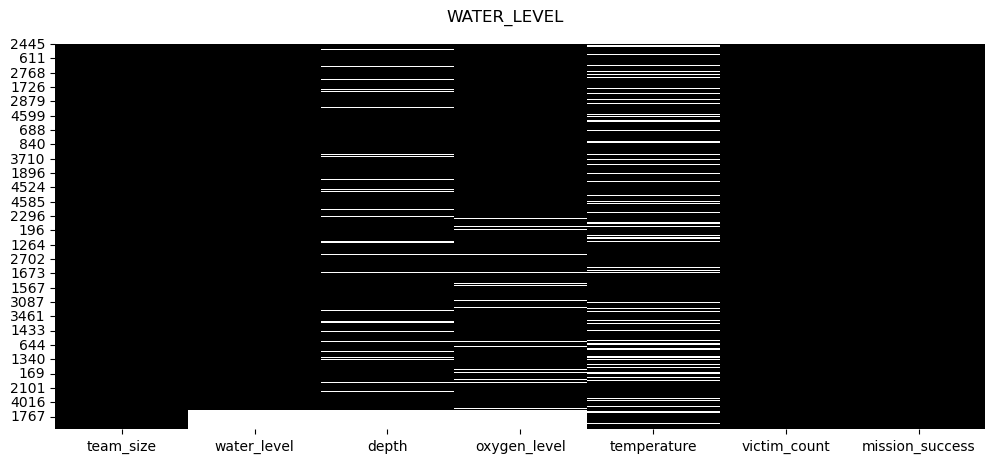

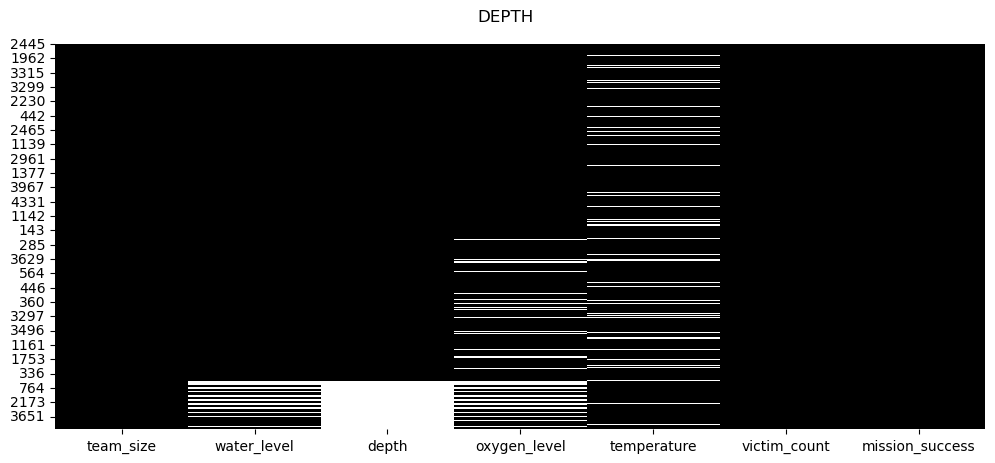

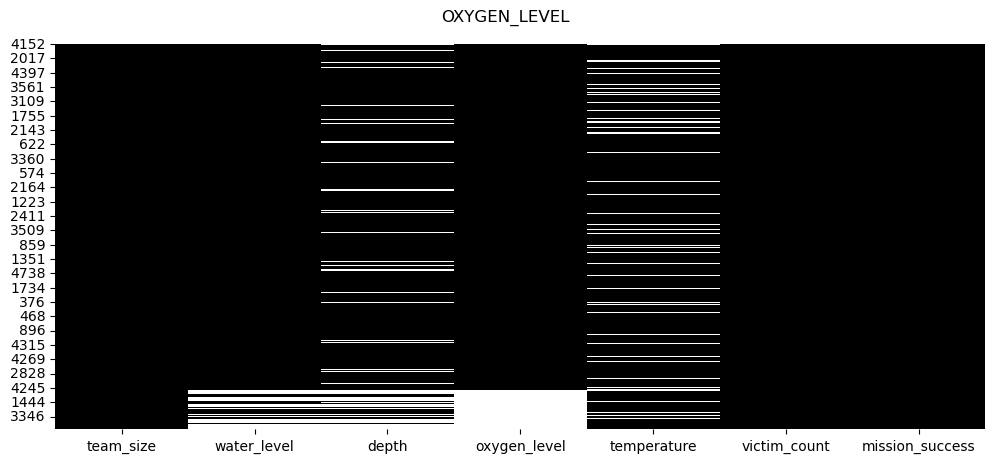

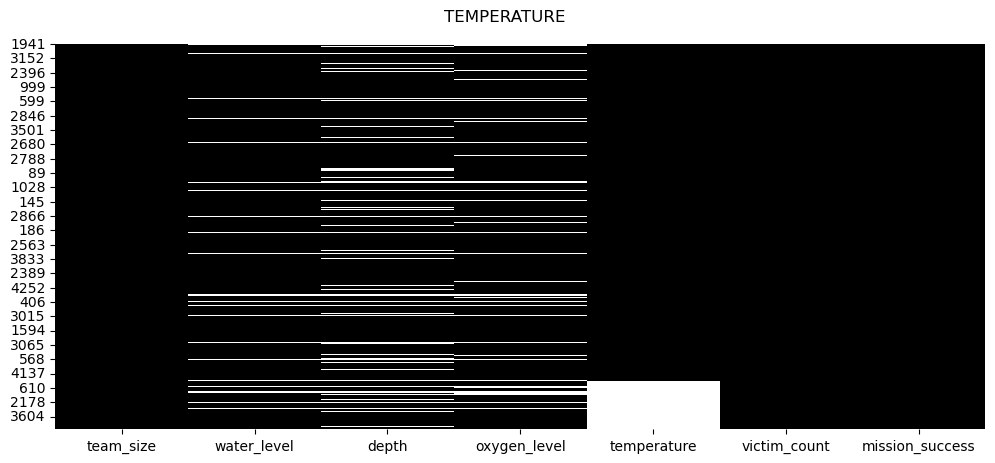

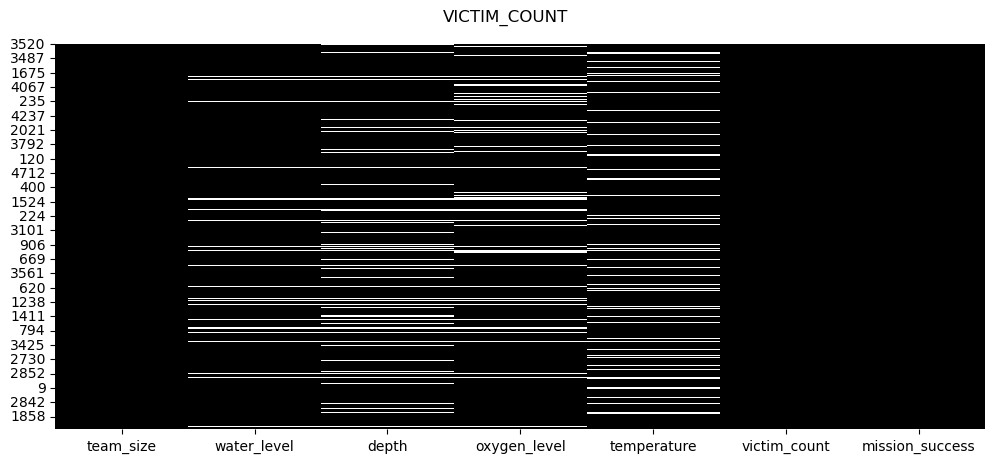

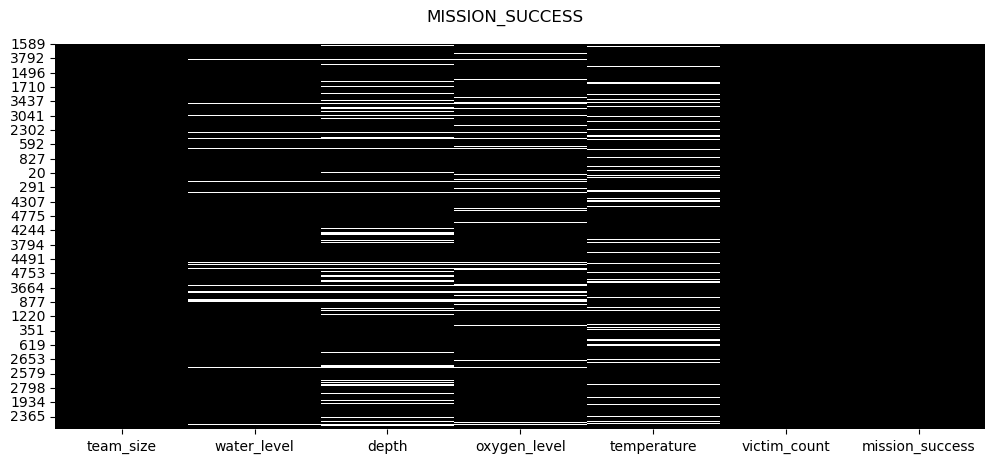

In [204]:
number_columns = list(df.select_dtypes(include=['number']).columns)
# number_columns

df_number = df[number_columns].copy()

plt.figure(figsize=(12,5))

for col in number_columns:
    plt.figure(figsize=(12,5))
    sns.heatmap(df_number.sort_values(by=[col]).isnull(),cbar=False, cmap= 'Greys_r')
    plt.suptitle(col.upper(), y=0.95)

### Conclusion
- water level: `MAR`
- depth: `MAR`
- temp: `MCAR`

### Missing Value Mechanism
- `MCAR (Missing Completely at Random)`: Missingness is unrelated to any data, observed or unobserved.
- `MAR (Missing at Random)`: Missingness is related to observed data, not the missing data itself. >> impute for this case
- `MNAR (Missing Not at Random)`: Missingness is related to the missing data itself. >>> unobserved variable i.e. human error

## Impute

### temp
- ffill + bfill

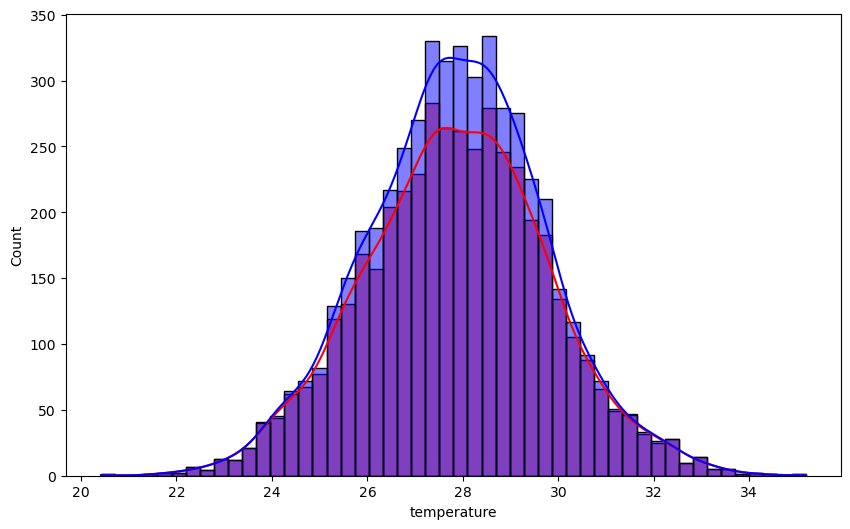

In [68]:
df = pd.read_csv('data/tham_luang_rescue_data.csv',
                 # parse_dates=['timestamp'],
                 # index_col=['datetime']
                )
df.drop(columns=['id'],inplace=True)
df['timestamp']=pd.to_datetime(df['timestamp'],unit='s')

def forward_backward_mean_imputer(s):
    ffill = s.ffill()
    bfill = s.bfill()
    imputed = (ffill + bfill)/2
    if pd.isna(imputed.iloc[0]):
        imputed.iloc[0]= bfill.iloc[0]
    if pd.isna(imputed.iloc[-1]):
        imputed.iloc[-1]= ffill.iloc[-1]
    return imputed

df.sort_values(by=['timestamp'],inplace=True)
df['temperature_imp'] = forward_backward_mean_imputer(df['temperature'])

fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['temperature'],kde='True',color='red',alpha=0.5,ax=ax,bins=50)
sns.histplot(df['temperature_imp'],kde='True',color='blue',alpha=0.5,ax=ax,bins=50)
plt.show()

#### result
- increase only data volume

## Impute for analysis
- impute for descriptive analysis
- impute for statistical analysis

### Impute for descriptive analysis

timestamp mission_type  team_size  water_level  \
65   2018-06-23 00:00:00.000000000       supply          5    16.239243   
4620 2018-06-23 00:04:53.818763494  exploration          6    14.798401   
1435 2018-06-23 00:09:47.637527704  exploration         10    14.018872   
2976 2018-06-23 00:14:41.456291199  exploration          4    15.039483   
332  2018-06-23 00:19:35.275054932  exploration          2    14.705225   

         depth  oxygen_level  temperature victim_status  victim_count  \
65    8.147363     24.032340    27.450962      critical             1   
4620  7.509043     27.174762    27.582644        stable             1   
1435  7.029478     13.984746    27.787695      critical             1   
2976  7.457727     23.898319    25.160201      critical             1   
332   7.239808           NaN    30.438944       unknown             1   

      mission_success  
65                  0  
4620                0  
1435                0  
2976                0  
332                 0

timestamp mission_type  team_size  water_level  \
0 2018-06-23 00:00:00.000000000       supply          5    16.239243   
1 2018-06-23 00:04:53.818763494  exploration          6    14.798401   
2 2018-06-23 00:09:47.637527704  exploration         10    14.018872   
3 2018-06-23 00:14:41.456291199  exploration          4    15.039483   
4 2018-06-23 00:19:35.275054932  exploration          2    14.705225   

      depth  oxygen_level  temperature victim_status  victim_count  \
0  8.147363     24.032340    27.450962      critical             1   
1  7.509043     27.174762    27.582644        stable             1   
2  7.029478     13.984746    27.787695      critical             1   
3  7.457727     23.898319    25.160201      critical             1   
4  7.239808           NaN    30.438944       unknown             1   

   mission_success  
0                0  
1                0  
2                0  
3                0  
4                0

option#1: listwise deletion
(4138, 12)
             day_of_year  water_level
day_of_year     1.000000    -0.985211
water_level    -0.985211     1.000000


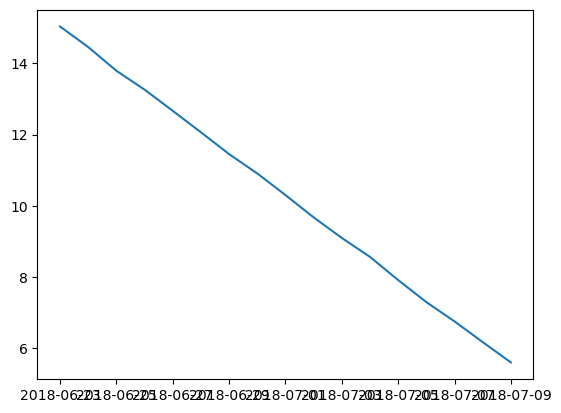

option#2: iterative imputer
(5000, 10)
             day_of_year  water_level
day_of_year     1.000000    -0.984894
water_level    -0.984894     1.000000


C:\Users\khala\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


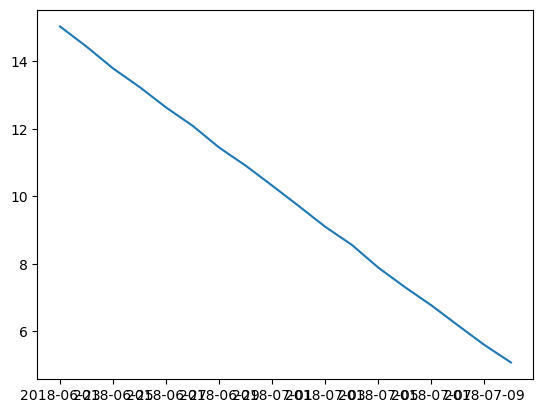

option#3: KNN imputer
(5000, 10)
             day_of_year  water_level
day_of_year     1.000000    -0.985652
water_level    -0.985652     1.000000


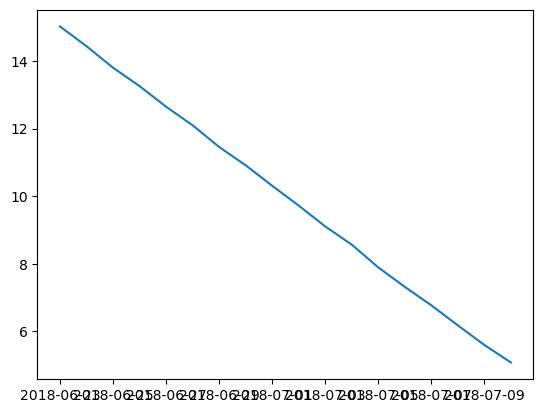

In [97]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('data/tham_luang_rescue_data.csv',
                 # parse_dates=['timestamp'],
                 # index_col=['datetime']
                )
df.drop(columns=['id'],inplace=True)
df['timestamp']=pd.to_datetime(df['timestamp'],unit='s')

def forward_backward_mean_imputer(s):
    ffill = s.ffill()
    bfill = s.bfill()
    imputed = (ffill + bfill)/2
    if pd.isna(imputed.iloc[0]):
        imputed.iloc[0]= bfill.iloc[0]
    if pd.isna(imputed.iloc[-1]):
        imputed.iloc[-1]= ffill.iloc[-1]
    return imputed

df.sort_values(by=['timestamp'],inplace=True)
display(df.head())
df['temperature'] = forward_backward_mean_imputer(df['temperature'])
df.reset_index(drop=True, inplace=True)
display(df.head())
# df.info()


# option#1: listwise deletion
print('option#1: listwise deletion')
df_baseline = df.dropna().copy()
df_baseline['date'] = df_baseline['timestamp'].dt.date
df_baseline['day_of_year']= df_baseline['timestamp'].dt.dayofyear
daily_water_level = df_baseline.groupby('date')['water_level'].mean().reset_index()
print(df_baseline.shape)

print(df_baseline[['day_of_year','water_level']].corr())
plt.plot(daily_water_level['date'],daily_water_level['water_level'])
plt.show()


# option#2: iterative imputer
print('option#2: iterative imputer')
imputer = IterativeImputer(random_state=55, estimator = DecisionTreeRegressor())
df_timestamp = df['timestamp']
df_imputed = df.drop(columns=['timestamp','mission_type','victim_status'])
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed),columns=df_imputed.columns)

df_imputed['timestamp']= df_timestamp
df_imputed['date'] = df_imputed['timestamp'].dt.date
df_imputed['day_of_year']= df_imputed['timestamp'].dt.dayofyear
daily_water_level = df_imputed.groupby('date')['water_level'].mean().reset_index()
print(df_imputed.shape)

print(df_imputed[['day_of_year','water_level']].corr())
plt.plot(daily_water_level['date'],daily_water_level['water_level'])
plt.show()


# option#3: KNN imputer
print('option#3: KNN imputer')
imputer = KNNImputer(n_neighbors=5)
df_timestamp = df['timestamp']
df_imputed = df.drop(columns=['timestamp','mission_type','victim_status'])
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed),columns=df_imputed.columns)

df_imputed['timestamp']= df_timestamp
df_imputed['date'] = df_imputed['timestamp'].dt.date
df_imputed['day_of_year']= df_imputed['timestamp'].dt.dayofyear
daily_water_level = df_imputed.groupby('date')['water_level'].mean().reset_index()
print(df_imputed.shape)


print(df_imputed[['day_of_year','water_level']].corr())
plt.plot(daily_water_level['date'],daily_water_level['water_level'])
plt.show()

#### result
- some case does not converged

### Imputation for statistical analysis
- temp: ffill + bfill
- oxygen level: KNN
- water level: linear regression
- depth: linear regression
- depth: iterative imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency, f_oneway
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data/tham_luang_rescue_data.csv',
                 # parse_dates=['timestamp'],
                 # index_col=['datetime']
                )
df.drop(columns=['id'],inplace=True)
df['timestamp']=pd.to_datetime(df['timestamp'],unit='s')
def forward_backward_mean_imputer(s):
    ffill = s.ffill()
    bfill = s.bfill()
    imputed = (ffill + bfill)/2
    if pd.isna(imputed.iloc[0]):
        imputed.iloc[0]= bfill.iloc[0]
    if pd.isna(imputed.iloc[-1]):
        imputed.iloc[-1]= ffill.iloc[-1]
    return imputed

# temperature
df.sort_values(by=['timestamp'],inplace=True)
# display(df.head())
df['temperature'] = forward_backward_mean_imputer(df['temperature'])
df.reset_index(drop=True, inplace=True)
# display(df.head())
# df.info()


# oxygen_level not linear, so use KNN
number_columns = list(df.select_dtypes(include=['number']).columns)
df_oxygen =df[number_columns].drop(columns=['water_level','depth'])
imputer = KNNImputer(n_neighbors=5)
df_oxygen = pd.DataFrame(imputer.fit_transform(df_oxygen),columns=df_oxygen.columns)
# df_oxygen.info()


# water_level: linear regression
df_reg = df[['victim_count', 'depth','water_level']].dropna()
X = df_reg[['victim_count','depth']]
y = df_reg[['water_level']]
model = LinearRegression()
model.fit(X,y)
r2= model.score(X,y)
print(r2)

# depth: linear regression
df_reg = df[['victim_count', 'depth','water_level']].dropna()
X = df_reg[['victim_count','water_level']]
y = df_reg[['depth']]
model = LinearRegression()
model.fit(X,y)
r2= model.score(X,y)
print(r2)


# depth: iterative imputer
df_water_depth =  df[['victim_count','water_level', 'depth']].copy()
imputer = IterativeImputer(random_state=55,
                           estimator=LinearRegression(),
                           imputation_order='random',
                          max_iter=100)
df_water_depth = pd.DataFrame(imputer.fit_transform(df_water_depth),
                              columns=df_water_depth.columns)

df['oxygen_level'] = df_oxygen['oxygen_level']
df['water_level'] = df_water_depth['water_level']
df['depth'] = df_water_depth['depth']

# df.info()

# number_columns = list(df.select_dtypes(include=['number']).columns)
# df_number= df[number_columns].copy()
# ax =pd.plotting.scatter_matrix(df_number,diagonal='kde',figsize=(13,13))

## Statistical analysis
- water: one-way
- depth: one-way
- temp: one-way
- oxygen_level: logistics

In [ ]:
# statistical analysis
# water
success_water_level = df[df['mission_success']==1]['water_level']
failure_water_level = df[df['mission_success']==0]['water_level']
f_water, p_water = f_oneway(success_water_level,failure_water_level)
print(f'F={f_water:.5f}, p={p_water:.5f}')

# depth
success_depth = df[df['mission_success']==1]['depth']
failure_depth = df[df['mission_success']==0]['depth']
f_depth, p_depth = f_oneway(success_depth,failure_depth)
print(f'F={f_depth:.5f}, p={p_depth:.5f}')


# temp
success_temp = df[df['mission_success']==1]['temperature']
failure_temp = df[df['mission_success']==0]['temperature']
f_temp, p_temp = f_oneway(success_temp,failure_temp)
print(f'F={f_temp:.5f}, p={p_temp:.5f}')


# oxygen level: logistic regression
X = df[['oxygen_level']]
y = df['mission_success']
logreg = LogisticRegression()
logreg.fit(X,y)
print(f'Coefficient= {logreg.coef_[0][0]:.5f}')
print(f'Intercept= {logreg.intercept_[0]:.5f}')
print(f'Score= {logreg.score(X,y):.5f}')

0.9875815748914097
0.9821692330078733
F=744.96903, p=0.00000
F=739.54784, p=0.00000
F=0.91912, p=0.33775
Coefficient= 0.00842
Intercept= 0.11488
Score= 0.57020
